In [2]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# FSLR

In [3]:
stock_fslr = pd.read_csv('../../download_stock_data/FSLR.csv')
stock_fslr['Date'] = pd.to_datetime(stock_fslr['timestamp'])
stock_fslr.set_index('Date', inplace=True);
stock_fslr.drop(['timestamp'],axis=1, inplace=True)
stock_close_daily_fslr = pd.DataFrame(stock_fslr['close'])

In [4]:
stock_close_daily_fslr.rename(columns={'close':'close_fslr'},inplace=True)

In [5]:
stock_close_daily_fslr

,close_fslr
Date,
2021-05-18,72.39
2021-05-17,71.55
2021-05-14,72.58
2021-05-13,69.57
2021-05-12,69.73
...,...
2006-11-24,27.75
2006-11-22,26.88
2006-11-21,24.60


# GCTAY

In [6]:
stock_GCTAY = pd.read_csv('../../download_stock_data/GCTAY.csv')
stock_GCTAY['Date'] = pd.to_datetime(stock_GCTAY['timestamp'])
stock_GCTAY.set_index('Date', inplace=True);
stock_GCTAY.drop(['timestamp'],axis=1, inplace=True)
stock_close_daily_GCTAY = pd.DataFrame(stock_GCTAY['close'])

In [7]:
stock_close_daily_GCTAY.rename(columns={'close':'close_gctay'},inplace=True)

#  PLUG

In [8]:
stock_PLUG = pd.read_csv('../../download_stock_data/PLUG.csv')
stock_PLUG['Date'] = pd.to_datetime(stock_PLUG['timestamp'])
stock_PLUG.set_index('Date', inplace=True);
stock_PLUG.drop(['timestamp'],axis=1, inplace=True)
stock_close_daily_PLUG = pd.DataFrame(stock_PLUG['close'])

In [9]:
stock_close_daily_PLUG.rename(columns={'close':'close_plug'},inplace=True)

In [10]:
stock_close_daily_PLUG 

,close_plug
Date,
2021-05-18,27.02
2021-05-17,24.94
2021-05-14,24.58
2021-05-13,21.96
2021-05-12,22.24
...,...
1999-11-05,17.38
1999-11-04,19.06
1999-11-03,18.63


# RUN

In [11]:
stock_RUN = pd.read_csv('../../download_stock_data/RUN.csv')
stock_RUN['Date'] = pd.to_datetime(stock_RUN['timestamp'])
stock_RUN.set_index('Date', inplace=True);
stock_RUN.drop(['timestamp'],axis=1, inplace=True)
stock_close_daily_RUN = pd.DataFrame(stock_RUN['close'])

In [12]:
stock_close_daily_RUN.rename(columns={'close':'close_run'},inplace=True)

In [13]:
stock_close_daily_RUN

,close_run
Date,
2021-05-18,40.11
2021-05-17,40.00
2021-05-14,41.42
2021-05-13,39.45
2021-05-12,39.63
...,...
2015-08-11,9.79
2015-08-10,10.12
2015-08-07,10.14


# SPWR

In [14]:
stock_SPWR = pd.read_csv('../../download_stock_data/SPWR.csv')
stock_SPWR['Date'] = pd.to_datetime(stock_SPWR['timestamp'])
stock_SPWR.set_index('Date', inplace=True);
stock_SPWR.drop(['timestamp'],axis=1, inplace=True)
stock_close_daily_SPWR = pd.DataFrame(stock_SPWR['close'])

In [15]:
stock_close_daily_SPWR.rename(columns={'close':'close_spwr'},inplace=True)

In [16]:
stock_close_daily_SPWR

,close_spwr
Date,
2021-05-18,22.195
2021-05-17,21.950
2021-05-14,22.240
2021-05-13,20.910
2021-05-12,21.250
...,...
2005-11-23,25.140
2005-11-22,25.100
2005-11-21,26.600


# Merge Stock prices

In [17]:
stock_all = pd.merge(stock_close_daily_fslr,stock_close_daily_GCTAY , how='left', left_on=['Date'], right_on=['Date'] )

In [18]:
stock_all = pd.merge(stock_all,stock_close_daily_RUN , how='left', left_on=['Date'], right_on=['Date'] )

In [19]:
stock_all = pd.merge(stock_all,stock_close_daily_PLUG , how='left', left_on=['Date'], right_on=['Date'] )

In [20]:
stock_all = pd.merge(stock_all,stock_close_daily_SPWR , how='left', left_on=['Date'], right_on=['Date'] )

In [21]:
stock_all

,close_fslr,close_gctay,close_run,close_plug,close_spwr
Date,,,,,
2021-05-18,72.39,6.480,40.11,27.02,22.195
2021-05-17,71.55,6.200,40.00,24.94,21.950
2021-05-14,72.58,6.300,41.42,24.58,22.240
2021-05-13,69.57,6.030,39.45,21.96,20.910
2021-05-12,69.73,6.005,39.63,22.24,21.250
...,...,...,...,...,...
2006-11-24,27.75,NaN,NaN,4.09,38.910
2006-11-22,26.88,NaN,NaN,4.12,39.990
2006-11-21,24.60,NaN,NaN,4.11,38.100


In [22]:
stock_all.dropna(inplace=True)

In [23]:
stock_all.sort_index(ascending=True,inplace=True)

In [24]:
stock_all

,close_fslr,close_gctay,close_run,close_plug,close_spwr
Date,,,,,
2015-08-05,51.92,3.260,10.77,2.78,27.570
2015-08-06,51.20,3.310,8.77,2.37,26.090
2015-08-07,52.08,3.310,10.14,2.40,25.090
2015-08-10,53.48,3.310,10.12,2.38,26.040
2015-08-11,51.44,3.250,9.79,2.33,24.930
...,...,...,...,...,...
2021-05-12,69.73,6.005,39.63,22.24,21.250
2021-05-13,69.57,6.030,39.45,21.96,20.910
2021-05-14,72.58,6.300,41.42,24.58,22.240


In [25]:
stock_all['close_mean'] = stock_all.mean(axis=1)

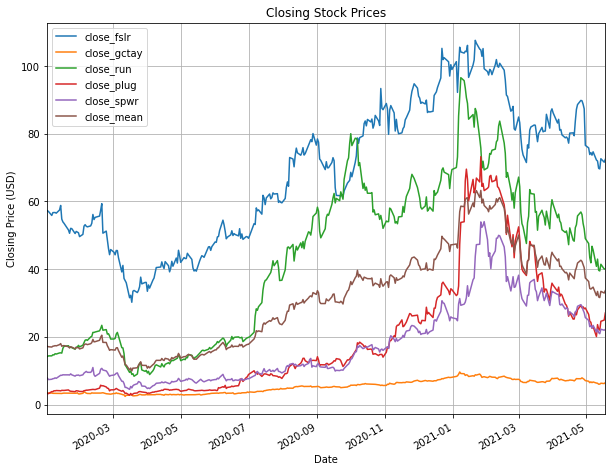

In [31]:
title='Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Date'


ax = stock_all['2020-01-01':].plot(figsize=(10,8), title=title);
ax.autoscale(axis='x',tight=True);
ax.grid(True)
ax.set(xlabel=xlabel, ylabel=ylabel);

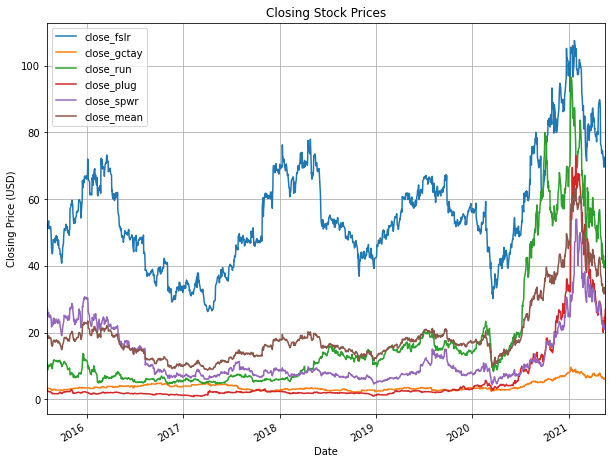

In [33]:
title='Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Date'


ax = stock_all['2011-01-01':].plot(figsize=(10,8), title=title);
ax.autoscale(axis='x',tight=True);
ax.grid(True)
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('../../stock_prices_images_final/all_stock_prices_2015_2021.png')


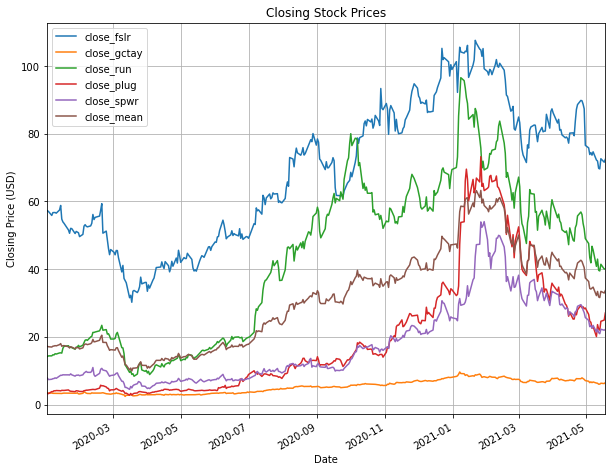

In [34]:
title='Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Date'


ax = stock_all['2020-01-01':].plot(figsize=(10,8), title=title);
ax.autoscale(axis='x',tight=True);
ax.grid(True)
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('../../stock_prices_images_final/all_stock_prices_2020_2021.png')

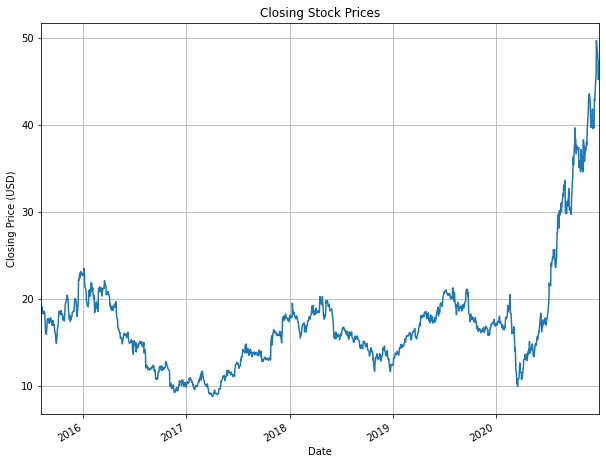

In [36]:
title='Closing Stock Prices'
ylabel='Closing Price (USD)'
xlabel='Date'


ax = stock_all['close_mean']['2015-01-01':'2021-01-01'].plot(figsize=(10,8), title=title);
ax.autoscale(axis='x',tight=True);
ax.grid(True)
ax.set(xlabel=xlabel, ylabel=ylabel);
plt.savefig('../../stock_prices_images_final/mean_stock_2015_2021.png')

In [144]:
stock_all.to_csv('./stock_all.csv')